# Exploratory Data Analysis

### Importing the libraries
----

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv("../artifacts/raw.csv")
df.head()

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved  
1                  2200000              8800000           3300000    Rejected  
2                  4500000             33300000          12800000    Rejected  
3                  3300000             23300000           7900000    Rejected  
4                  8200000             29400000           5000000    Rejected

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [30]:
df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

In [11]:
num_cols = df.select_dtypes(exclude='object').column
cat_cols = df.select_dtypes(include='object').columns.to_list()

In [42]:
df[df['loan_id'].duplicated(keep = False) == True].sort_values(['loan_id'])   

Empty DataFrame
Columns: [loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []

In [14]:
print("Number of Numerical Columns in data:",len(num_cols))
print("Number of Categorical Columns in data:",len(cat_cols))

Number of Numerical Columns in data: 10
Number of Categorical Columns in data: 3


### By the data cleaning scans, we have confirmed:

- There is no null value and duplicated value in this dataset.

- no_of_dependents, education, self_employed and loan_status are categorical columns.

- There are a total 4269 rows in this dataset, with 13 columns (features).

- There are 2656 data with an approved loan_status, which is about 62.2% compared to the "rejected" group. The dataset is slightly imbalanced but it is acceptable and we don't need to rebalance it.

- Other columns are numerical.ical.


In [21]:
def show_value_counts(df, cat_cols):
    for col in cat_cols:
        if col in df.columns:
            print(f"Value counts for column: {col}")
            print(df[col].value_counts())
            print("\n" + "-"*50 + "\n")
        else:
            print(f"Column '{col}' not found in the DataFrame.\n")

In [22]:
show_value_counts(df, cat_cols)

Value counts for column: education
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: self_employed
self_employed
Yes    2150
No     2119
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: loan_status
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

--------------------------------------------------



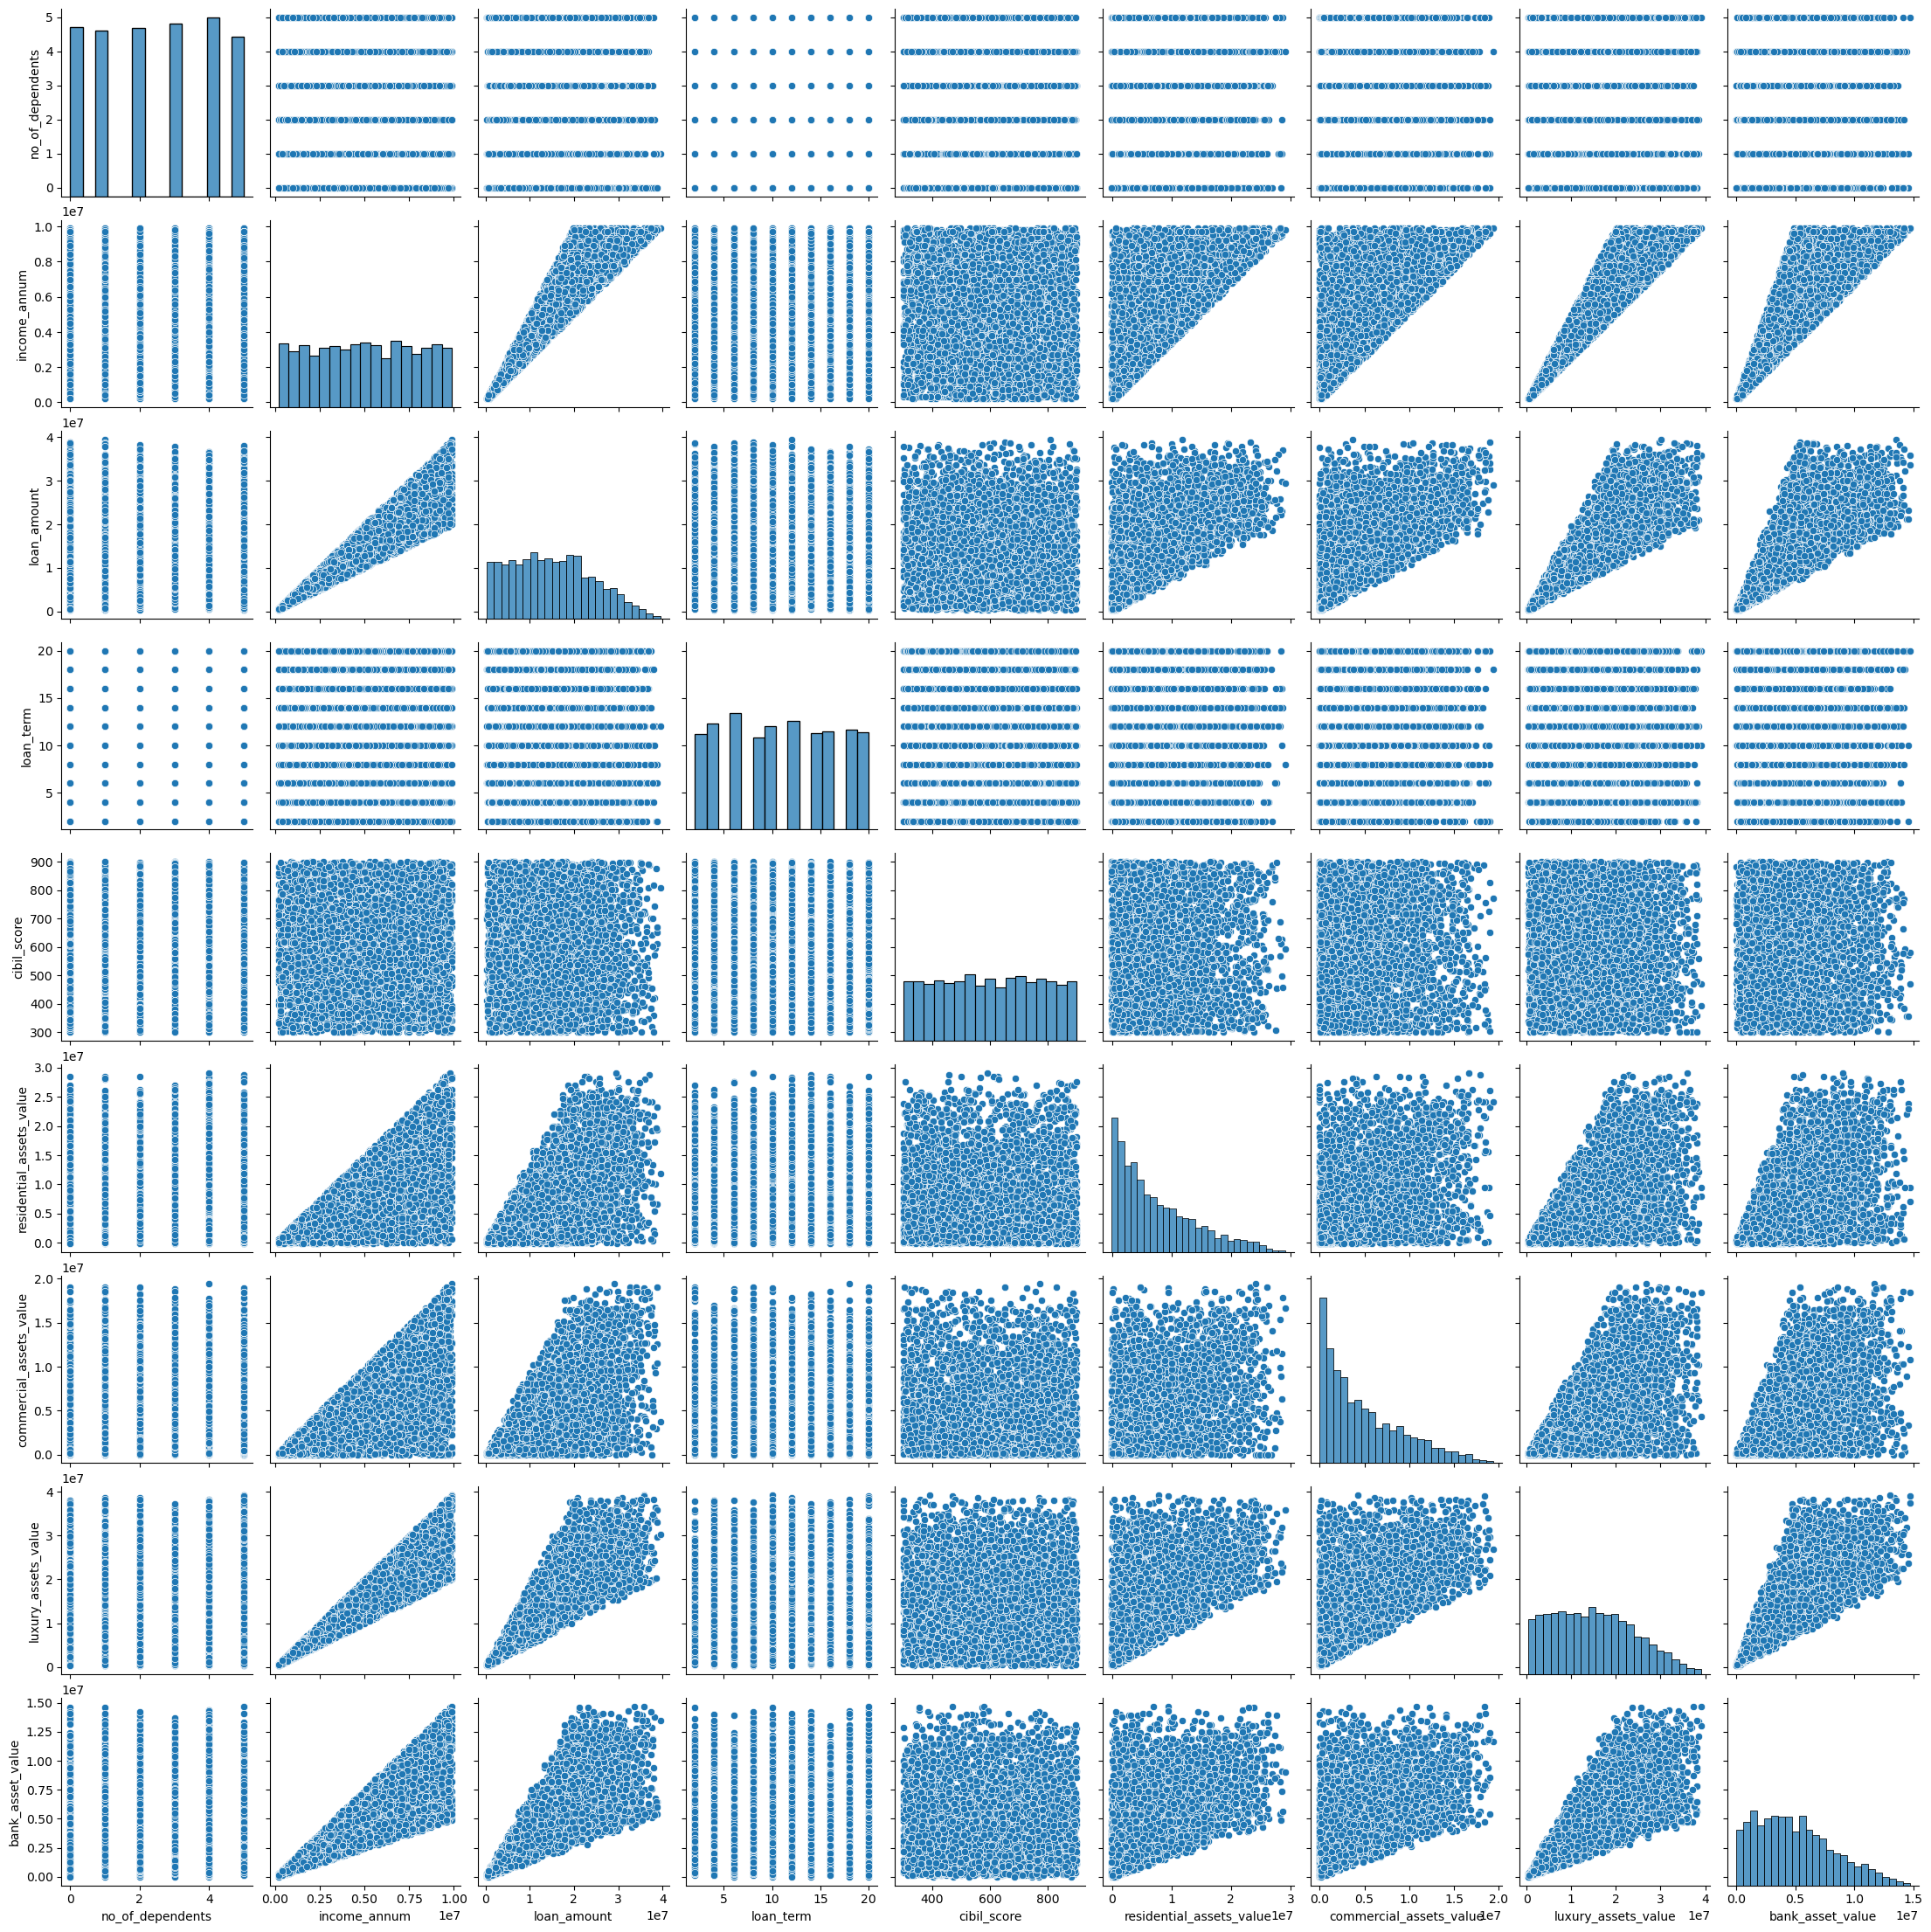

In [41]:
df2 = df.drop(['loan_id'], axis=1)
sns.pairplot(df2)

### There are some variables having positive correlation with other variables, for example:
- `loan_amount & income_annum`

- `luxury_assets_value & bank_asset_value`

- `income_annum & luxury_assets_value.`

### Loan Amount

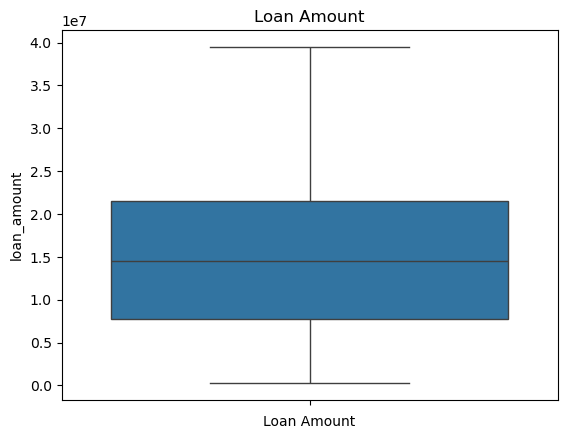

In [44]:
sns.boxplot(df['loan_amount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

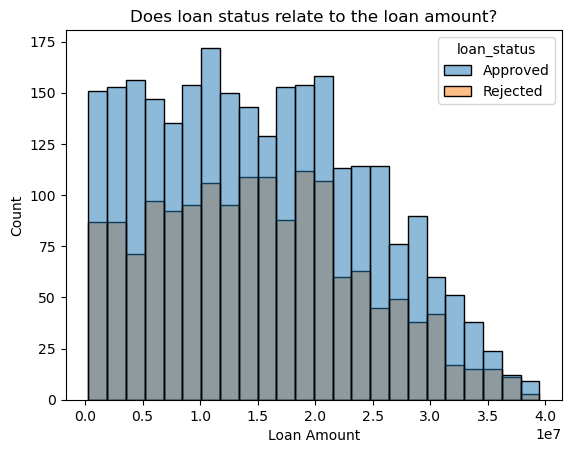

In [45]:
sns.histplot(df, x='loan_amount', hue='loan_status')
plt.title("Does loan status relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

both approved and rejected loans have the same trends based on the different loan amounts, `we haven't seen a strong relationship between the loan status and the loan amount in the histogram`, 

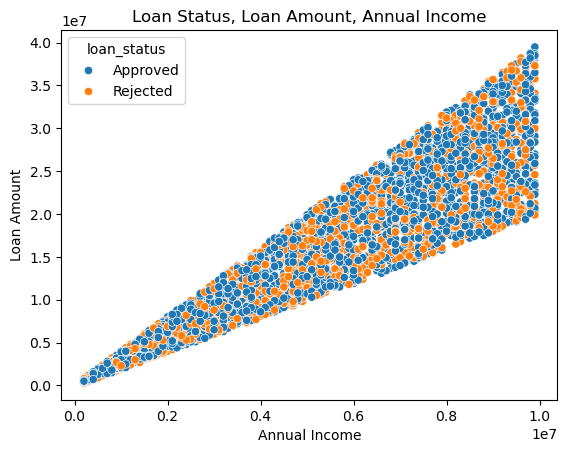

In [46]:
sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

#### Insights

- When `annual income increases, the loan amount tends to increase`. But the annual income doesn't show an obvious trend with the loan status.

- In this dataset, the `applicants who have the lower annual income have a narrow range in loan amounts`. Vise Versa, the `applicants who have the higher lower annual income have a wider range in the loan amounts`. Besides that the lenders will only accept the loan amount that aligns with the annual income in order to insure the applicants have ability to pay the loan back, it is easy to imagine the applicants who have higher annual income have more flexibility on the amount of the loan, whatever for themselves or for the lenders.

- In this dataset, the `applicants who has highest annual income has been approved when they apply for the highest loan amount` (see the upper right corner of the figure), but at the same time, the `applicants who have the highest annual income have chances of being rejected when they apply lower loan amount` (see the middle right of the figure/lower right of the triangle). It can be caused by different lenders and other conditions of the applicants. Let's use some code to take a closer look at it.

In [55]:
df.loc[(df['income_annum'] == df['income_annum'].max()) & (df['loan_status'] == 'Rejected')]

loan_id  no_of_dependents     education self_employed  income_annum  \
82         83                 2  Not Graduate           Yes       9900000   
157       158                 5  Not Graduate           Yes       9900000   
1179     1180                 5      Graduate            No       9900000   
1272     1273                 5  Not Graduate            No       9900000   
1409     1410                 3      Graduate           Yes       9900000   
1547     1548                 1      Graduate           Yes       9900000   
1890     1891                 5      Graduate            No       9900000   
2862     2863                 4      Graduate            No       9900000   
2869     2870                 4      Graduate            No       9900000   
3000     3001                 1  Not Graduate           Yes       9900000   
3548     3549                 2  Not Graduate            No       9900000   
4191     4192                 2      Graduate           Yes       9900000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
82       21200000         16          363                  25500000   
157      33300000          6          364                   5300000   
1179     35700000         10          392                   7900000   
1272     35800000         20          470                   9500000   
1409     29900000         20          490                  10500000   
1547     34100000         14          371                  24400000   
1890     24600000          2          530                  24200000   
2862     30000000         18          496                  10400000   
2869     26100000          2          481                  14500000   
3000     25700000          2          340                  15600000   
3548     19900000          6          312                  21400000   
4191     37300000          8          385                    600000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
82                   11400000             26600000           6800000   
157                  18700000             27800000           8300000   
1179                  4300000             39200000          13000000   
1272                 18400000             39100000          14700000   
1409                  9100000             27100000           7400000   
1547                  7100000             29300000           6200000   
1890                 12800000             20400000          13000000   
2862                  8000000             29300000          13800000   
2869                  5000000             23600000           9300000   
3000                 18800000             29500000          11800000   
3548                  2200000             31400000          11000000   
4191                   900000             27400000          14200000   

     loan_status  
82      Rejected  
157     Rejected  
1179    Rejected  
1272    Rejected  
1409    Rejected  
1547    Rejected  
1890    Rejected  
2862    Rejected  
2869    Rejected  
3000    Rejected  
3548    Rejected  
4191    Rejected

*We have noticed that applicants who have the highest annual income tried to apply for a lower loan amount, but were rejected by the lenders. By checking up the subset (showing above), we confirm that the `loan amount is not the main reason that causes their applications to be rejected`. Taking a closer look at this subset, I see `their cibil_score are considered as "Poor"`.*

#### The standard of the credit scores are: 

- `300-579:` Poor
- `580-669:` Fair
- `670-739:` Good
- `740-799:` Very good.

###  Credit Score(Cibil Score)

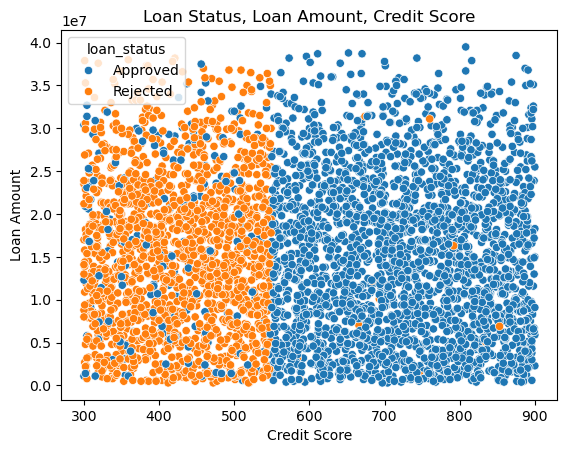

In [56]:
sns.scatterplot(x=df['cibil_score'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

The credit scores around 540 - 550 separate the loan status into two parts in a very clear way. In the other words, the `loan status is highly related to the credit score`.

It is also interesting to see the credit score that separates the loan status is not 579 which is the highest score of the "poor" credit score. In the other words, `the poor credit scores which are above 540 - 550 still have a good chance of being approved by loan lenders`. This could be attributed to lenders' flexibility or specific factors that impact approval decisions.

In [61]:
df.loc[(df['cibil_score'] > 740) & (df['loan_status'] =='Rejected')]

loan_id  no_of_dependents     education self_employed  income_annum  \
236       237                 3      Graduate           Yes        900000   
559       560                 2      Graduate           Yes        200000   
911       912                 0      Graduate           Yes       1300000   
1446     1447                 1      Graduate            No        300000   
3213     3214                 1  Not Graduate           Yes       4300000   
3527     3528                 0      Graduate            No       1800000   
4099     4100                 3      Graduate            No       8700000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
236       3500000          4          770                    700000   
559        500000          6          885                   -100000   
911       4800000          4          835                    500000   
1446      1200000         18          747                    100000   
3213     16300000         14          792                    400000   
3527      6900000         10          853                    900000   
4099     31100000         16          760                    400000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
236                         0              2000000            600000   
559                         0               300000            200000   
911                    100000              3300000            800000   
1446                        0               700000            200000   
3213                   400000             10200000           4000000   
3527                   400000              3700000           1700000   
4099                  1800000             19300000           4800000   

     loan_status  
236     Rejected  
559     Rejected  
911     Rejected  
1446    Rejected  
3213    Rejected  
3527    Rejected  
4099    Rejected

### residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value

- Residential Assets Value: This is likely a measure of the total value of residential properties or real estate assets owned by the individuals or organizations in the dataset.

- Commercial Assets Value: This could represent the total value of commercial properties or business-related assets owned by the individuals or organizations in the dataset. Commercial properties might include office buildings, retail spaces, warehouses, and similar assets.

- Luxury Assets Value: This might refer to the total value of high-end or luxury items owned by the individuals or organizations. These could include items such as luxury vehicles, valuable artwork, jewelry, and other premium possessions.

- Bank Asset Value: This is possibly the total value of assets held by the bank or lending institution itself. It might include cash reserves, investments, and other financial assets."

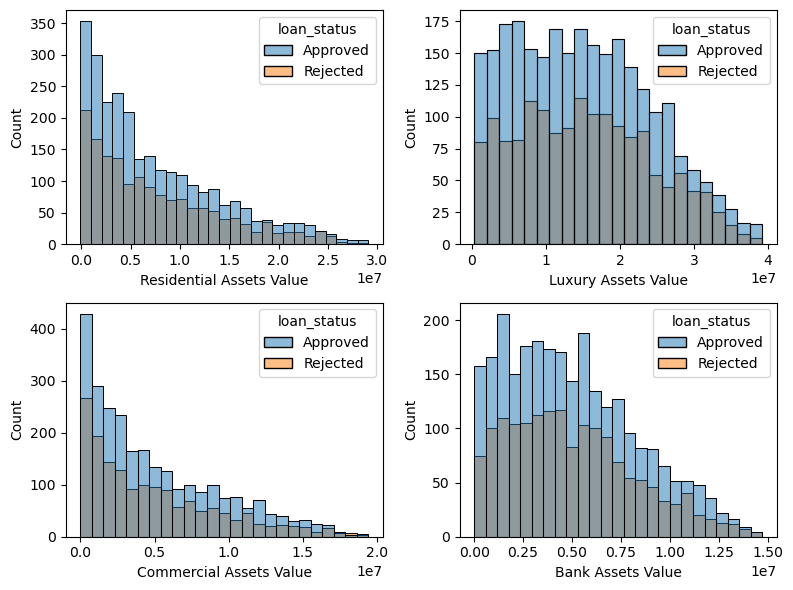

In [62]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(df, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(df, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(df, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(df, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [64]:
df_corr = df.select_dtypes(exclude="object").drop(columns=['loan_id'], axis=1)
loan_asset_corr = df_corr.corr()

<Axes: >

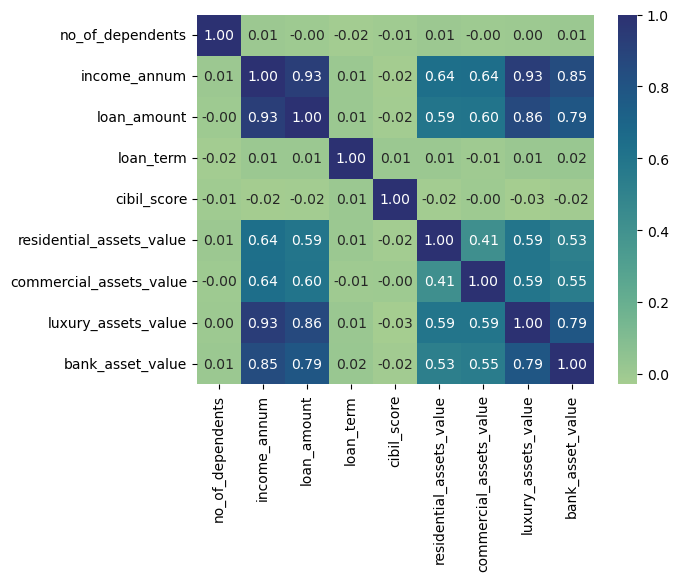

In [67]:
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="crest")

All the asset values have moderate to strong positive linear relationships with the annual income. As the applicants who have more annual income tend to have more flexibility on purchasing the properties with higher asset values especially the luxury assets value.

1. Nature of Assets:

- Luxury assets and bank assets might have a stronger connection to an individual's income. People with higher incomes might be more likely to have luxury assets or maintain bank assets.

- Residential and commercial assets might be influenced by other factors such as location, real estate market trends, and investment strategies, which could result in a slightly weaker correlation with income.

2. Economic Status:

- People with higher incomes could afford luxury items and have larger bank assets, resulting in a tighter correlation.

- Residential and commercial assets might be affected by broader economic trends and market conditions, leading to a less direct correlation with individual income.

3. Diverse Income Sources:

- Some individuals might have diverse income sources beyond their primary job, impacting the relationship between assets and annual income.

4. Data Variability:

- Natural variability in data could contribute to variations in correlation strength. A smaller dataset might result in less precise estimates of correlation.

5. Outliers and Extreme Values:

- Extreme values or outliers in the data can influence correlation values. If a few individuals with extremely high income also have high asset values, it could strengthen the correlation.

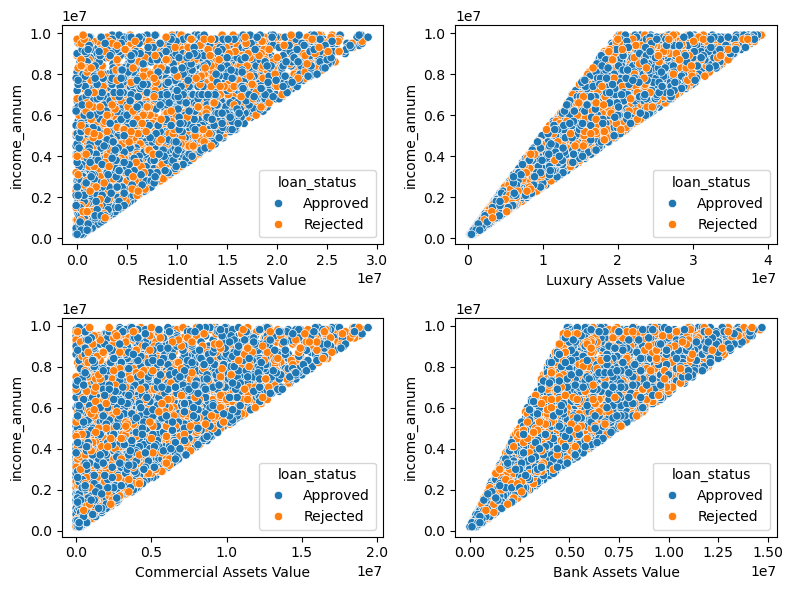

In [68]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.scatterplot(df, x = 'residential_assets_value', y= 'income_annum', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")

sns.scatterplot(df, x = 'commercial_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")

sns.scatterplot(df, x = 'luxury_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")

sns.scatterplot(df, x = 'bank_asset_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")

plt.tight_layout()
plt.show()

We can see, both of `residential_assets_value`, `commercial_assets_value` create right triangles on the scatter plots, cutting the plot into two sections. This indicates that the relationship between annual income and these asset values might have some sort of threshold effect. For example, once the asset value reaches a certain point, the annual income tends to increase significantly.

The obtuse triangle `luxury_assets_value`, `bank_asset_value` suggest have a different type of relationship. The smaller triangle for luxury assets value compared to bank asset value might indicate that while there's a strong correlation between luxury assets value and annual income, there's a higher variability in annual income for any given luxury assets value. In other words, luxury assets might be a good indicator of higher annual income, but there are exceptions.

### Loan Term

In [8]:
cross_loan_term = pd.crosstab(index=df['loan_term'], columns=df['loan_status'])
cross_loan_term['Total'] = cross_loan_term['Approved'] + cross_loan_term['Rejected'] 
cross_loan_term['Approved_percentage'] = (cross_loan_term['Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage'] = (cross_loan_term['Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status  Approved  Rejected  Total  Approved_percentage  \
loan_term                                                     
2                 315        89    404            77.970297   
4                 366        81    447            81.879195   
6                 282       208    490            57.551020   
8                 220       166    386            56.994819   
10                229       207    436            52.522936   
12                276       180    456            60.526316   
14                239       166    405            59.012346   
16                236       176    412            57.281553   
18                257       165    422            60.900474   
20                236       175    411            57.420925   

loan_status  Rejected_percentage  
loan_term                         
2                      22.029703  
4                      18.120805  
6                      42.448980  
8                      43.005181  
10                     47.477064  
12                     39.473684  
14                     40.987654  
16                     42.718447  
18                     39.099526  
20                     42.579075

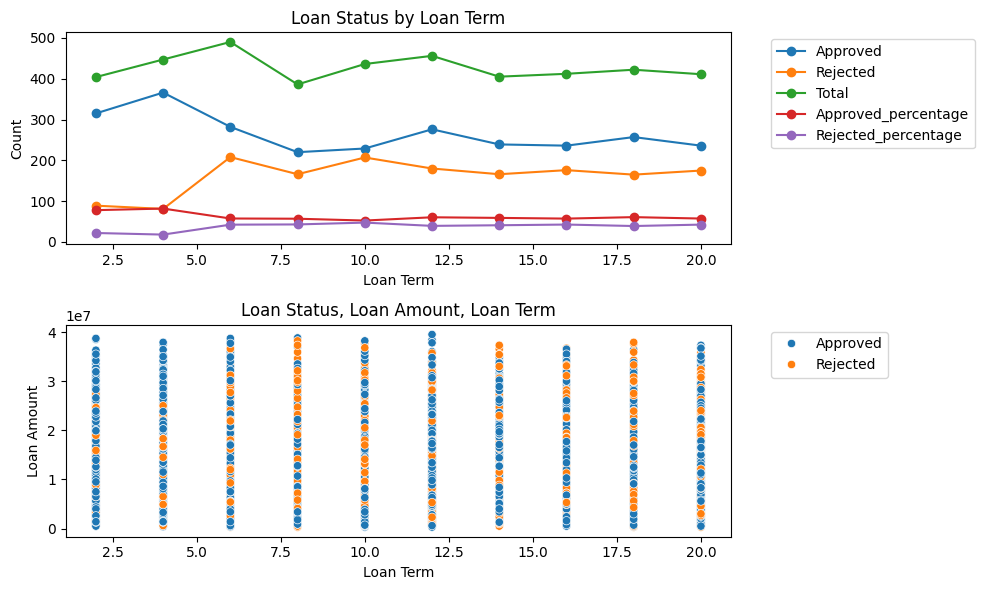

In [9]:
fig,axes = plt.subplots(2,1, figsize=(10,6))
cross_loan_term.plot(kind='line', marker='o', ax = axes[0])
axes[0].set_xlabel('Loan Term')
axes[0].set_ylabel('Count')
axes[0].set_title('Loan Status by Loan Term')
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

sns.scatterplot(df, x = 'loan_term', y = 'loan_amount', hue = 'loan_status', ax = axes[1])
axes[1].set_title("Loan Status, Loan Amount, Loan Term")
axes[1].set_xlabel("Loan Term")
axes[1].set_ylabel("Loan Amount")
axes[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.show()

- The total observations for each of the loan terms are very even, we appreciate the owner of this dataset, so we can analyze the data much easier without worrying about the balancing.

- The shortest loan term in this dataset, which is 2 years, gets the one of the most chances for being approved by the lenders, compared to other loan terms, except the 4 years loan term which gets the most chances for being approved.

- When the loan term is more than 4 years, the chance of being rejected have significantly increased, vise versa, the chance of being approved have dropped. Until the loan term equals to 8, both chances of being approved and rejected are tended to be normal. When the loan term reaches the 10 years, it is a loan term whose chance of being approved and rejected are approximately the same. After 10 years, the trend is becoming more consistent and the chance of being approved is slightly higher than the chance of being rejected

In [74]:
df.loc[(df['loan_term'] <=4) & (df['loan_status'] =='Rejected')].sort_values(['loan_amount']).head(10)

loan_id  no_of_dependents     education self_employed  income_annum  \
1388     1389                 4      Graduate           Yes        300000   
1061     1062                 3  Not Graduate            No        300000   
3393     3394                 5  Not Graduate            No        300000   
1199     1200                 2  Not Graduate            No        300000   
949       950                 2      Graduate           Yes        300000   
853       854                 3  Not Graduate            No        300000   
519       520                 2      Graduate           Yes        500000   
2643     2644                 4      Graduate            No        600000   
1012     1013                 5      Graduate           Yes        500000   
3475     3476                 5  Not Graduate            No        700000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1388       500000          2          353                    600000   
1061       500000          2          477                    700000   
3393       600000          4          418                    500000   
1199       600000          2          383                    600000   
949        700000          4          411                    600000   
853        800000          2          458                    500000   
519       1300000          4          427                   1400000   
2643      1400000          4          507                    200000   
1012      1400000          4          471                    500000   
3475      1400000          4          344                   1500000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
1388                   100000              1200000            400000   
1061                   200000               800000            400000   
3393                   200000               700000            200000   
1199                   300000              1100000            400000   
949                         0              1200000            100000   
853                         0              1100000            200000   
519                    500000              1800000            600000   
2643                   300000              1700000            400000   
1012                   100000              1300000            300000   
3475                   800000              2600000            300000   

     loan_status  
1388    Rejected  
1061    Rejected  
3393    Rejected  
1199    Rejected  
949     Rejected  
853     Rejected  
519     Rejected  
2643    Rejected  
1012    Rejected  
3475    Rejected

The `low credit scores should be one of the most important reasons that the applications have been rejected`, `another reason can be the annual income since most of the applicants in this subset (group) have the annual income lower than the median (5100000)`. Other than those 2 reasons, I guess the number of the dependents can also be a reason for rejection (in this subset, the number of dependents are all more than 2), especially when the applicants have lower annual income.

### Number of dependents


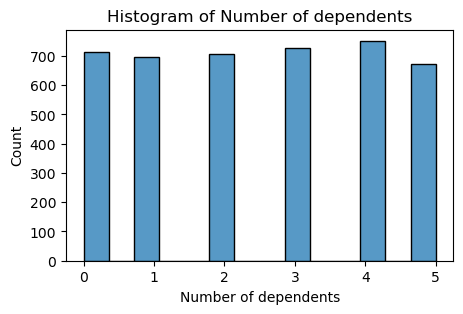

In [75]:
plt.figure(figsize = (5,3))
sns.histplot(df['no_of_dependents'])
plt.xlabel("Number of dependents")
plt.title("Histogram of Number of dependents")

plt.show()

In [77]:
cross_dependents = pd.crosstab(index=df['no_of_dependents'], columns=df['loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents['Approved']/(cross_dependents['Approved'] + cross_dependents['Rejected'])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents['Rejected']/(cross_dependents['Approved'] + cross_dependents['Rejected'])) * 100
cross_dependents

loan_status       Approved  Rejected  Approved_percentage  Rejected_percentage
no_of_dependents                                                              
0                      457       255            64.185393            35.814607
1                      430       267            61.692970            38.307030
2                      441       267            62.288136            37.711864
3                      457       270            62.861073            37.138927
4                      465       287            61.835106            38.164894
5                      406       267            60.326895            39.673105

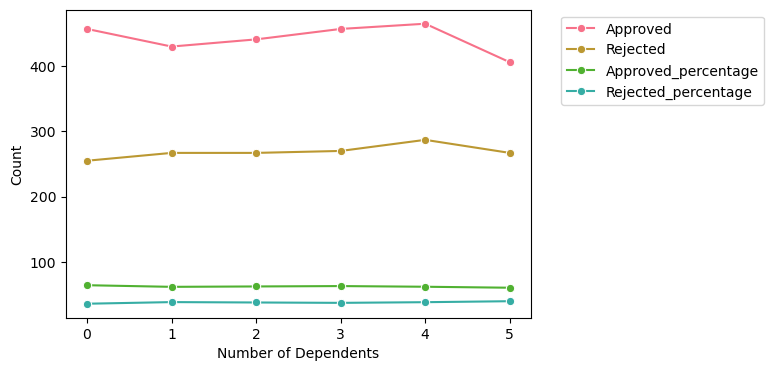

In [78]:
palette = sns.color_palette("husl")

plt.figure(figsize = (6,4))
sns.lineplot(data=cross_dependents, dashes=False, markers="o", palette=palette)
plt.ylabel("Count")
plt.xlabel("Number of Dependents")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

By checking the line chart above which presents the percentage of the applicants being approved or rejected by the number of dependents, we see 2 percentage lines are very evenly, even though we can see a wave over the "approved" line, it might be because of the total number of the applicants. So I can say there isn't any obvious trend between `no_of_dependents` and `loan_status`.

### Education

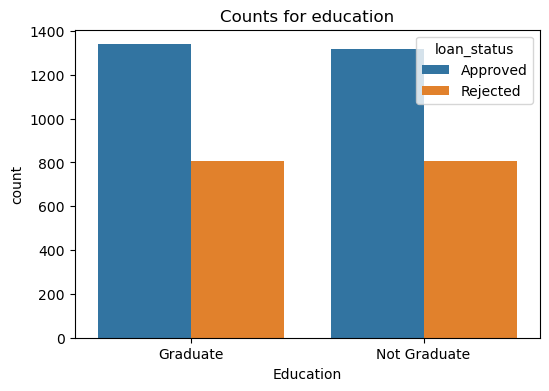

In [79]:
plt.figure(figsize = (6,4))
sns.countplot(df, x='education', hue='loan_status')
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

In [80]:
education = df.groupby(["education"], as_index=False).agg(
    count_by_education=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

education

education  count_by_education  median_annual_income  \
0      Graduate                2144             5100000.0   
1  Not Graduate                2125             5000000.0   

   average_loan_amount  average_credit_score  average_loan_term  \
0          15229151.12                599.14              10.85   
1          15036894.12                600.74              10.95   

   avg_residential_value  avg_commerical_value  avg_luxury_value  \
0             7543376.87            4943610.07       15239319.03   
1             7401223.53            5002964.71       15012282.35   

   avg_bank_value  
0      5007182.84  
1      4945929.41

By this column chart and sub-table, we can say `there are no significant differences between the education and other variables` in this dataset.

### Self Employed

In [81]:
self_employed = df.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

self_employed

self_employed  count  median_annual_income  average_loan_amount  \
0            No   2119             5100000.0          15120245.40   
1           Yes   2150             5100000.0          15146465.12   

   average_credit_score  average_loan_term  avg_residential_value  \
0                600.78              10.88             7432373.76   
1                599.10              10.92             7512279.07   

   avg_commerical_value  avg_luxury_value  avg_bank_value  
0            5052713.54       15085842.38       4977395.0  
1            4894744.19       15166186.05       4976000.0

Same thing as the `self_employed` - there are no significant differences between the self_employed and other variables in this dataset.

## Feature Engineering

In [90]:
df_dummies = pd.get_dummies(df, dtype='int')
df_dummies = df_dummies.drop(['education_Not Graduate', 'self_employed_No', 'loan_status_Rejected'], axis=1)
df_dummies.rename(columns = {'education_Graduate':'education', 'self_employed_Yes':'self_employed', 'loan_status_Approved':'loan_status' }, inplace = True)

In [91]:
df_dummies

loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0           1                 2       9600000     29900000         12   
1           2                 0       4100000     12200000          8   
2           3                 3       9100000     29700000         20   
3           4                 3       8200000     30700000          8   
4           5                 5       9800000     24200000         20   
...       ...               ...           ...          ...        ...   
4264     4265                 5       1000000      2300000         12   
4265     4266                 0       3300000     11300000         20   
4266     4267                 2       6500000     23900000         18   
4267     4268                 1       4100000     12800000          8   
4268     4269                 1       9200000     29700000         10   

      cibil_score  residential_assets_value  commercial_assets_value  \
0             778                   2400000                 17600000   
1             417                   2700000                  2200000   
2             506                   7100000                  4500000   
3             467                  18200000                  3300000   
4             382                  12400000                  8200000   
...           ...                       ...                      ...   
4264          317                   2800000                   500000   
4265          559                   4200000                  2900000   
4266          457                   1200000                 12400000   
4267          780                   8200000                   700000   
4268          607                  17800000                 11800000   

      luxury_assets_value  bank_asset_value  education  self_employed  \
0                22700000           8000000          1              0   
1                 8800000           3300000          0              1   
2                33300000          12800000          1              0   
3                23300000           7900000          1              0   
4                29400000           5000000          0              1   
...                   ...               ...        ...            ...   
4264              3300000            800000          1              1   
4265             11000000           1900000          0              1   
4266             18100000           7300000          0              0   
4267             14100000           5800000          0              0   
4268             35700000          12000000          1              0   

      loan_status  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
4264            0  
4265            1  
4266            0  
4267            1  
4268            1  

[4269 rows x 13 columns]

In [93]:
y = df_dummies['loan_status']
X = df_dummies.drop(['loan_status'], axis =1)

In [95]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [96]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2561, 12), (2561,), (854, 12), (854,), (854, 12), (854,))

In [98]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_train_stand = stand_scaler.transform(X_train)
X_val_stand = stand_scaler.transform(X_val)
X_test_stand = stand_scaler.transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
clf = LogisticRegression().fit(X_train_stand,y_train)

In [102]:
coefficients = clf.coef_[0]
intercept = clf.intercept_

variables = list(X_train.columns)

clf_summary = []
for var, coef in zip(variables, coefficients):
    clf_summary.append([var, coef])

clf_summary.append(["Intercept", intercept[0]])


print(tabulate(clf_summary, headers=["Variables", "Coefficient"], tablefmt="grid"))


+--------------------------+---------------+
| Variables                |   Coefficient |
+==========================+===============+
| loan_id                  |    0.0833459  |
+--------------------------+---------------+
| no_of_dependents         |   -0.080053   |
+--------------------------+---------------+
| income_annum             |   -1.66929    |
+--------------------------+---------------+
| loan_amount              |    1.14484    |
+--------------------------+---------------+
| loan_term                |   -0.867652   |
+--------------------------+---------------+
| cibil_score              |    4.12798    |
+--------------------------+---------------+
| residential_assets_value |    0.0640193  |
+--------------------------+---------------+
| commercial_assets_value  |    0.0410162  |
+--------------------------+---------------+
| luxury_assets_value      |    0.33951    |
+--------------------------+---------------+
| bank_asset_value         |    0.188657   |
+---------

*`The logistic regression model was trained on the standardized features of the training data. The coefficients represent the change in the log-odds of the target variable for a one-unit increase in each standardized feature. The intercept term provides the baseline log-odds when all standardized features are zero. Positive coefficients indicate a positive association with the target variable, while negative coefficients indicate a negative association. The magnitude of the coefficients reflects the strength of the relationship between each feature and the log-odds of the outcome.`*

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_lr = clf.predict(X_val_stand) 
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_lr))
print('Precision:', '%.3f' % precision_score(y_val, y_lr))
print('Recall:', '%.3f' % recall_score(y_val, y_lr))
print('F1 Score:', '%.3f' % f1_score(y_val, y_lr))

Accuracy: 0.920
Precision: 0.935
Recall: 0.931
F1 Score: 0.933


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_forest = random_search.best_estimator_

In [109]:
best_params, best_forest

({'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': None},
 RandomForestClassifier(min_samples_leaf=2, n_estimators=50))

In [110]:
rf_opt = RandomForestClassifier(n_estimators = 150, max_depth = None, 
                                min_samples_leaf = 1, min_samples_split = 5,random_state = 0)
rf_opt.fit(X_train, y_train)
y_rf = rf_opt.predict(X_val)
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_rf))
print('Precision:', '%.3f' % precision_score(y_val, y_rf))
print('Recall:', '%.3f' % recall_score(y_val, y_rf))
print('F1 Score:', '%.3f' % f1_score(y_val, y_rf))

Accuracy: 0.972
Precision: 0.975
Recall: 0.978
F1 Score: 0.976


In [111]:
y_test_rf = rf_opt.predict(X_test)

print('Accuracy:', '%.3f' % accuracy_score(y_test, y_test_rf))
print('Precision:', '%.3f' % precision_score(y_test, y_test_rf))
print('Recall:', '%.3f' % recall_score(y_test, y_test_rf))
print('F1 Score:', '%.3f' % f1_score(y_test, y_test_rf))

Accuracy: 0.973
Precision: 0.979
Recall: 0.978
F1 Score: 0.979


The scores we've obtained on the test set are remarkably similar to the validation set scores, which is a positive indication that model's performance generalizes well to new and unseen data. Here's what the scores mean:

`Accuracy`: Both on the validation set and the test set, we have an accuracy of around 0.972 to 0.973. This suggests that our model is correctly classifying around 97.2% to 97.3% of instances in both datasets.

`Precision`: Precision measures how many of the predicted positive instances are actually positive. With a precision of around 0.978 in both sets, it means that about 97.8% of the instances predicted as positive by our model are truly positive.

`Recall`: Recall, also known as sensitivity or true positive rate, indicates how many of the actual positive instances our model is capturing. With a recall of around 0.979 in both sets, it means that our model is correctly identifying about 97.9% of the actual positive instances.

`F1 Score`: The F1 score is the harmonic mean of precision and recall and provides a balanced view of a model's performance. With an F1 score of around 0.979 in both sets, it indicates that the model is achieving a balanced trade-off between precision and recall.
The fact that these metrics are very consistent between the validation and test sets is a great sign. It suggests that the model is not overfitting to the validation set and that it's likely to perform similarly well on new, unseen data.
Overall, the Random Forest model seems to have achieved a solid and robust performance on both the validation and test sets, demonstrating its capability to make accurate predictions across different datasets.